In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 탐색

In [6]:
df=pd.read_csv('./data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
#0이면 생존자, 1이면 사망자
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
#등급
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#누락값 비율
df.isnull().sum()/df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

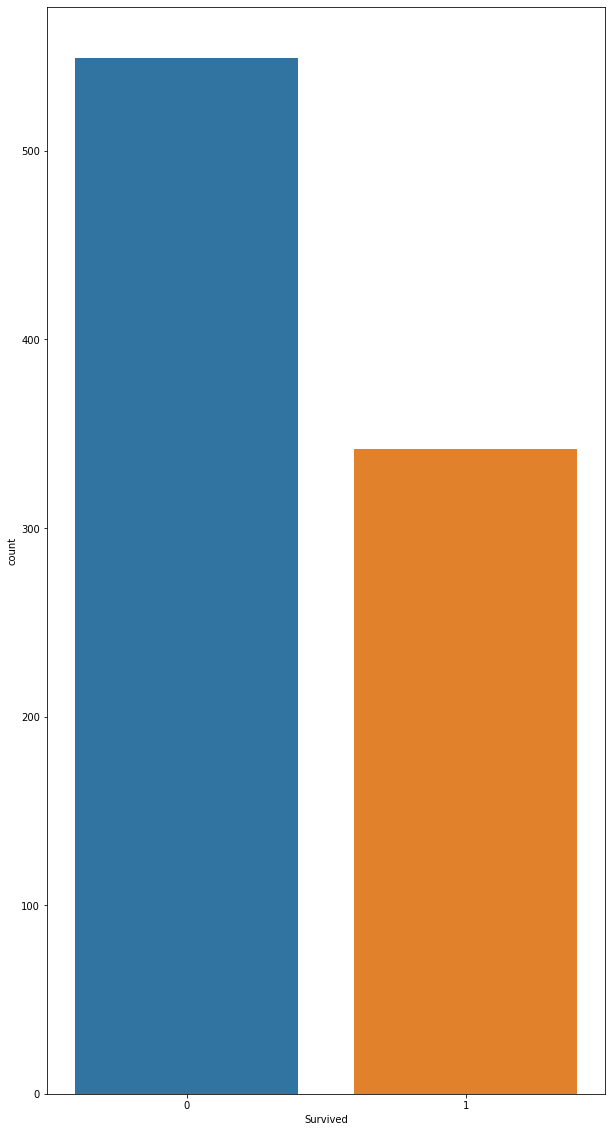

In [15]:
#생존자, 사망자 시각화
fig,ax=plt.subplots(figsize=(10,20))
sns.countplot('Survived',data=df,ax=ax)
plt.show()

In [16]:
df["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [17]:
#성별과 생존의 관계
df.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

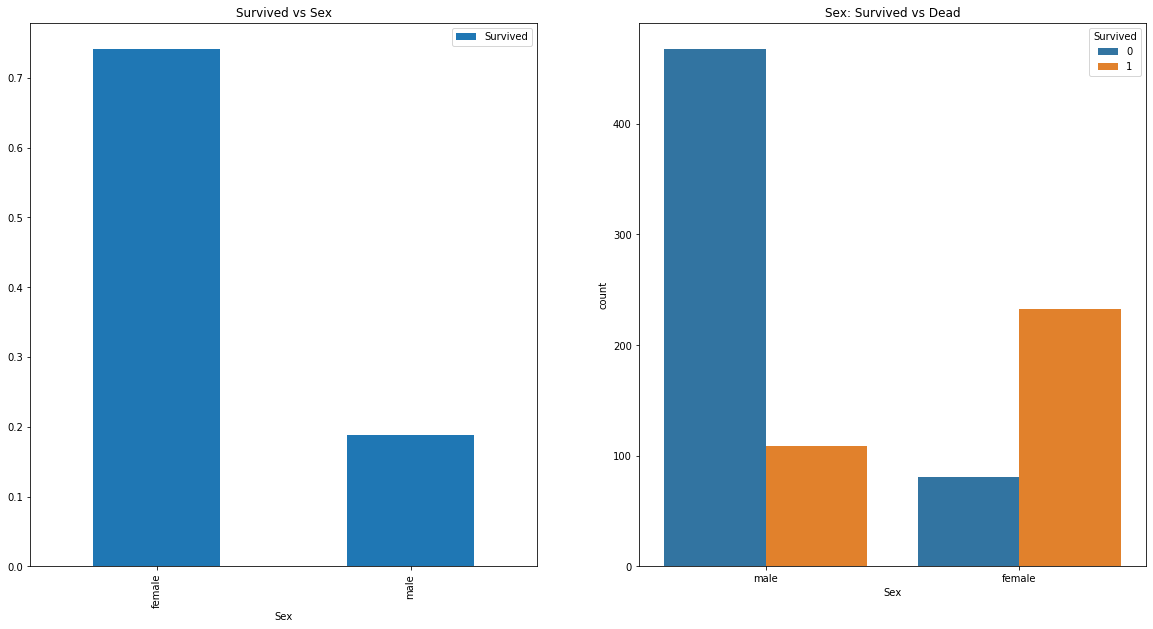

In [20]:
#성별과 생존 시각화
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(20,10))
df[["Sex","Survived"]].groupby(["Sex"]).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs Sex")
sns.countplot("Sex",hue="Survived",data=df,ax=ax[1])
ax[1].set_title("Sex: Survived vs Dead")
plt.show()

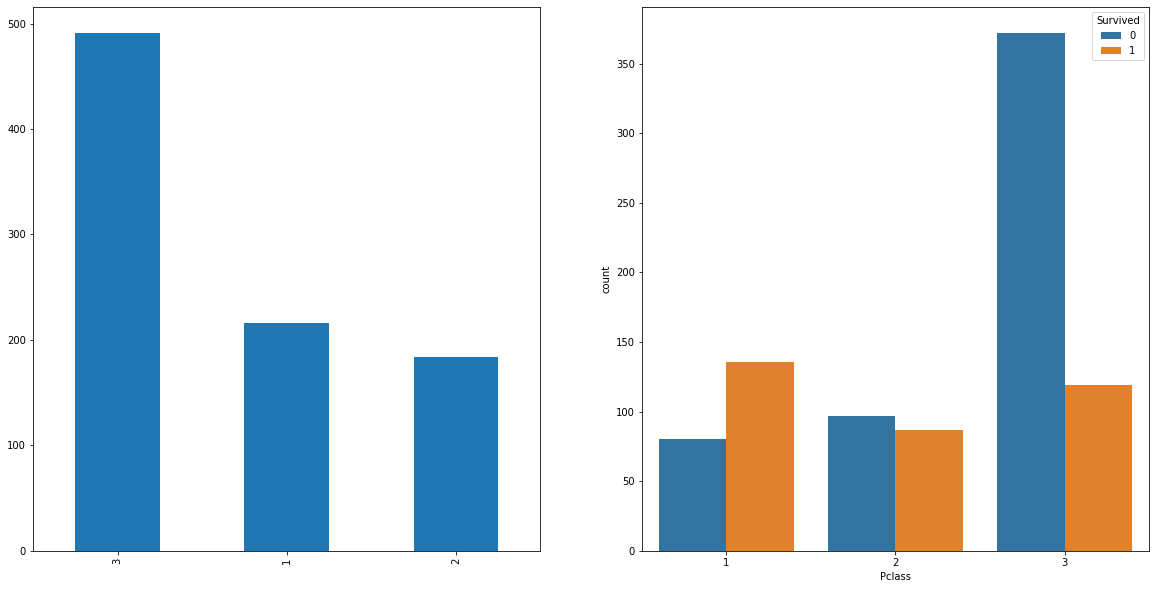

In [22]:
#Pclass와 생존 시각화
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(20,10))
df["Pclass"].value_counts().plot.bar(ax=ax[0])
sns.countplot("Pclass",hue="Survived",data=df,ax=ax[1])
plt.show()

In [25]:
#나이
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

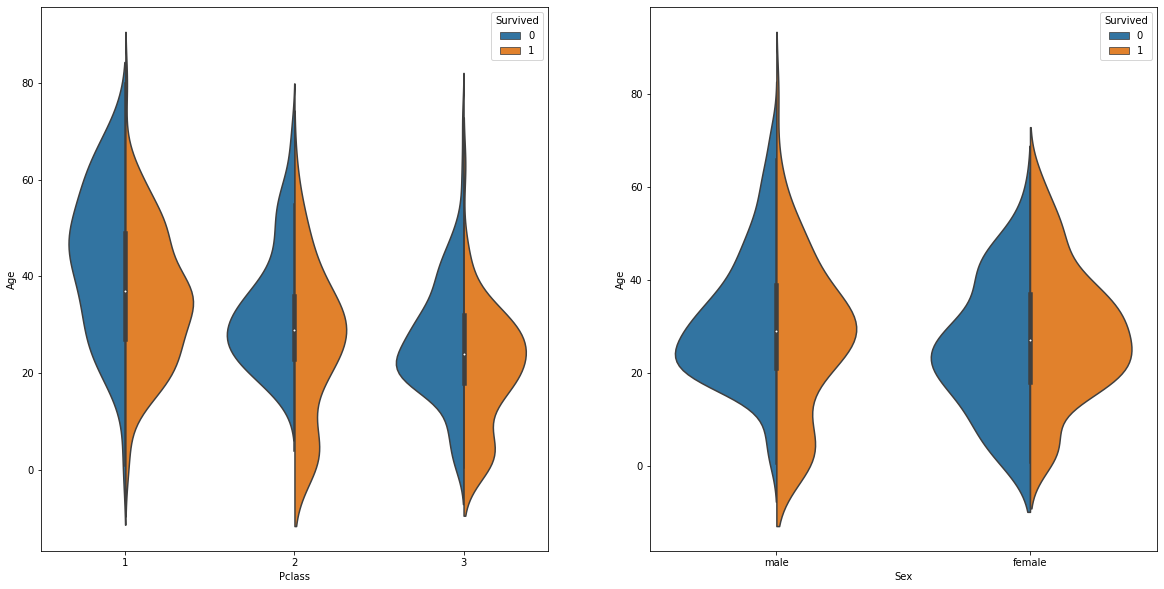

In [26]:
#다양한 변수 시각화
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
sns.violinplot("Pclass","Age",hue="Survived",data=df,split=True,ax=ax[0])
sns.violinplot("Sex","Age",hue="Survived",data=df,split=True,ax=ax[1])
plt.show()

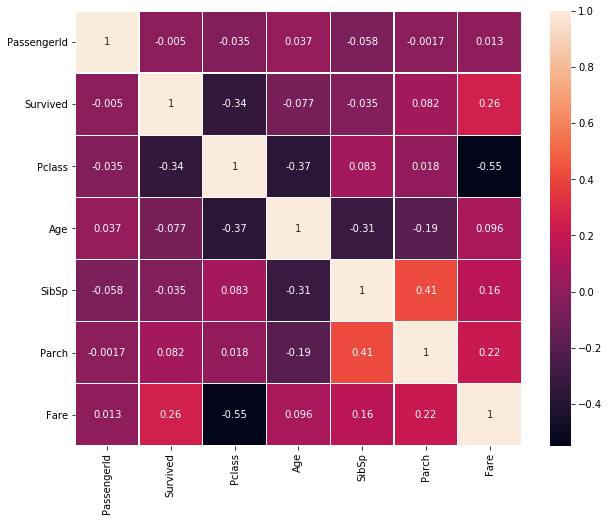

In [29]:
#변수 관계도
sns.heatmap(df.corr(),annot=True,linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# 변수가공 및 결측치처리

In [30]:
#나이: 수치형변수->범주형변수
df["Age_band"]=0

In [32]:
df.loc[df["Age"]<=16,"Age_band"]=0
df.loc[(df["Age"]>16)&(df["Age"]<=32),"Age_band"]=1
df.loc[(df["Age"]>32)&(df["Age"]<=48),"Age_band"]=2
df.loc[(df["Age"]>48)&(df["Age"]<=64),"Age_band"]=3
df.loc[(df["Age"]>64),"Age_band"]=4

In [33]:
df["Age_band"].value_counts()

1    346
0    277
2    188
3     69
4     11
Name: Age_band, dtype: int64

In [34]:
#성별: 수치형변수->범주형변수
df["Sex"].replace(["male","female"],[0,1],inplace=True)

In [37]:
#Embarked: 수치형변수->범주형변수
df["Embarked"].replace(["S","C","Q"],[0,1,2],inplace=True)

In [38]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,NaN,0.0,1


In [40]:
#저장하고 싶은 df
save_df=df.copy()

In [43]:
del df["PassengerId"],df["Name"]

In [46]:
del df["Ticket"]

In [47]:
del df["Cabin"]

In [48]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_band
0,0,3,0,22.0,1,0,7.25,0.0,1


# 예측

In [51]:
#다양한 알고리즘= 사용이유, 장점, 대체방법 등등
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [57]:
df=df[df["Age"].notnull()]
df=df[df["Embarked"].notnull()]

In [58]:
train_x ,test_x, train_y,test_y = train_test_split(df.drop(columns=["Survived"]),df["Survived"], test_size=0.2,random_state = 2019 )

In [59]:
model=svm.SVC(kernel="rbf",C=1,gamma=0.1)

In [60]:
model.fit(train_x,train_y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
test_x.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Age_band    0
dtype: int64

In [62]:
predict_svc=model.predict(test_x)

In [63]:
metrics.accuracy_score(predict_svc,test_y)

0.7132867132867133

In [66]:
model=LogisticRegression()
model.fit(train_x,train_y)

C:\Users\jmlee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
predict_logit=model.predict(test_x)

In [68]:
metrics.accuracy_score(predict_logit,test_y)

0.7622377622377622

In [69]:
model=RandomForestClassifier()
model.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
predict_f=model.predict(test_x)

In [71]:
metrics.accuracy_score(predict_f,test_y)

0.7552447552447552